In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [47]:
data = pd.read_csv("../data/state-daily-stats.csv")

In [48]:
data.drop(columns={"Unnamed: 0"}, inplace=True)

In [49]:
data.set_index("date", inplace=True)

In [50]:
data

,fips,cases,deaths,daily_new_cases,daily_new_deaths
date,,,,,
2020-01-21,53,1,0,1,0
2020-01-22,53,1,0,0,0
2020-01-23,53,1,0,0,0
2020-01-24,70,2,0,1,0
2020-01-25,76,3,0,1,0
...,...,...,...,...,...
2021-02-24,1762,28353261,505642,74130,3210
2021-02-25,1762,28431065,508107,77804,2465
2021-02-26,1762,28509327,510283,78262,2176


<AxesSubplot:xlabel='date'>

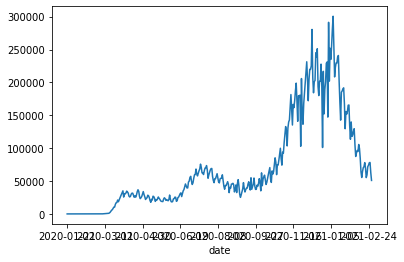

In [18]:
data["daily_new_cases"].rolling

In [31]:
test = pd.DataFrame(data["daily_new_cases"])

In [45]:
test[-10:]

,daily_new_cases
date,
2021-02-19,78035
2021-02-20,69723
2021-02-21,55195
2021-02-22,59462
2021-02-23,71802
2021-02-24,74130
2021-02-25,77804
2021-02-26,78262
2021-02-27,62694


C:\Users\coled\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

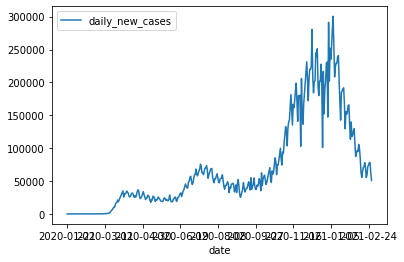

In [34]:
test_log = np.log(test)
test.plot()

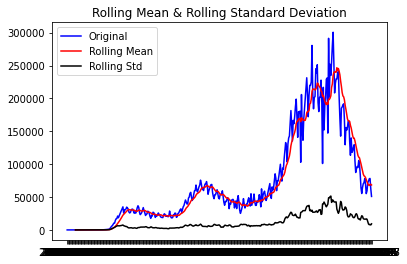

In [33]:
rolling_mean = test.rolling(window = 12).mean()
rolling_std = test.rolling(window = 12).std()
plt.plot(test, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()